In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [2]:
# Membaca dataset dari file yang diunggah
file_path = 'data_depression.csv'
data = pd.read_csv(file_path)

# Menampilkan 5 baris pertama untuk melihat struktur data
data.head()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
print(data.columns)


Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [4]:
# memilih baris dengan nilai "Working Professional"
data = data[data['Working Professional or Student'] == 'Student']


In [5]:
data.head(1000)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,32,Chhavi,Female,25.0,Jaipur,Student,NaN,4.0,NaN,8.13,3.0,NaN,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128,5128,Sai,Male,30.0,Srinagar,Student,NaN,4.0,NaN,6.99,4.0,NaN,More than 8 hours,Unhealthy,B.Tech,Yes,0.0,3.0,Yes,0
5130,5130,Trisha,Female,28.0,Kalyan,Student,NaN,3.0,NaN,9.60,4.0,NaN,Less than 5 hours,Moderate,B.Tech,Yes,2.0,5.0,Yes,1
5136,5136,Gagan,Male,28.0,Surat,Student,NaN,4.0,NaN,5.74,3.0,NaN,More than 8 hours,Unhealthy,M.Pharm,No,6.0,1.0,Yes,0
5142,5142,Chhavi,Female,31.0,Delhi,Student,NaN,3.0,NaN,8.93,2.0,NaN,Less than 5 hours,Healthy,LLM,No,12.0,1.0,No,0


In [6]:
# Mengecek jumlah total data (baris)
total_data = len(data)
print(f"Total data: {total_data}")


Total data: 27901


In [7]:
# Daftar fitur yang ingin dipanggil
selected_features = [ 'Academic Pressure', 'Study Satisfaction','Sleep Duration','Dietary Habits','Have you ever had suicidal thoughts ?','Work/Study Hours','Financial Stress','Family History of Mental Illness', 'Depression']

# Menampilkan data untuk fitur yang dipilih
print(data[selected_features].head())


    Academic Pressure  Study Satisfaction     Sleep Duration Dietary Habits  \
2                 5.0                 2.0          5-6 hours        Healthy   
8                 2.0                 5.0          5-6 hours       Moderate   
26                3.0                 5.0  Less than 5 hours        Healthy   
30                3.0                 2.0          7-8 hours       Moderate   
32                4.0                 3.0          5-6 hours       Moderate   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
2                                    Yes               3.0               1.0   
8                                     No               3.0               2.0   
26                                    No               9.0               1.0   
30                                   Yes               4.0               5.0   
32                                   Yes               1.0               1.0   

   Family History of Mental Illness  Depress

In [8]:
# Mengecek jumlah total data (baris)
total_data = len(data)
print(f"Total data: {total_data}")

Total data: 27901


In [9]:
# Daftar fitur yang ingin di-encode secara manual
manual_mappings = {
    'Sleep Duration': {
        'Less than 5 hours': 0,
        '5-6 hours': 1,
        '7-8 hours': 2,
        'More than 8 hours': 3
    },
    'Dietary Habits': {
        'Unhealthy': 0,
        'Moderate': 1,
        'Healthy': 2
    }
}

# Daftar fitur yang ingin di-encode otomatis
features_to_encode_automatic = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Inisialisasi LabelEncoder untuk encoding otomatis
encoder = LabelEncoder()

# Melakukan encoding manual
for feature, mapping in manual_mappings.items():
    data[feature] = data[feature].map(mapping)

# Melakukan encoding otomatis untuk fitur lainnya
for feature in features_to_encode_automatic:
    data[feature] = encoder.fit_transform(data[feature])

# Menampilkan hasil encoding
print("Encoding selesai. Contoh hasil:")
print(data[list(manual_mappings.keys()) + features_to_encode_automatic].head())


Encoding selesai. Contoh hasil:
    Sleep Duration  Dietary Habits  Have you ever had suicidal thoughts ?  \
2              1.0             2.0                                      1   
8              1.0             1.0                                      0   
26             0.0             2.0                                      0   
30             2.0             1.0                                      1   
32             1.0             1.0                                      1   

    Family History of Mental Illness  
2                                  0  
8                                  1  
26                                 1  
30                                 1  
32                                 0  


In [10]:
print(data[selected_features].head())

    Academic Pressure  Study Satisfaction  Sleep Duration  Dietary Habits  \
2                 5.0                 2.0             1.0             2.0   
8                 2.0                 5.0             1.0             1.0   
26                3.0                 5.0             0.0             2.0   
30                3.0                 2.0             2.0             1.0   
32                4.0                 3.0             1.0             1.0   

    Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
2                                       1               3.0               1.0   
8                                       0               3.0               2.0   
26                                      0               9.0               1.0   
30                                      1               4.0               5.0   
32                                      1               1.0               1.0   

    Family History of Mental Illness  Depression  

Jumlah dari setiap kelas pada fitur Depression:
Depression
1    16336
0    11565
Name: count, dtype: int64


C:\Users\rizal\AppData\Local\Temp\ipykernel_18324\2294081319.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=depression_counts.index, y=depression_counts.values, palette='viridis')


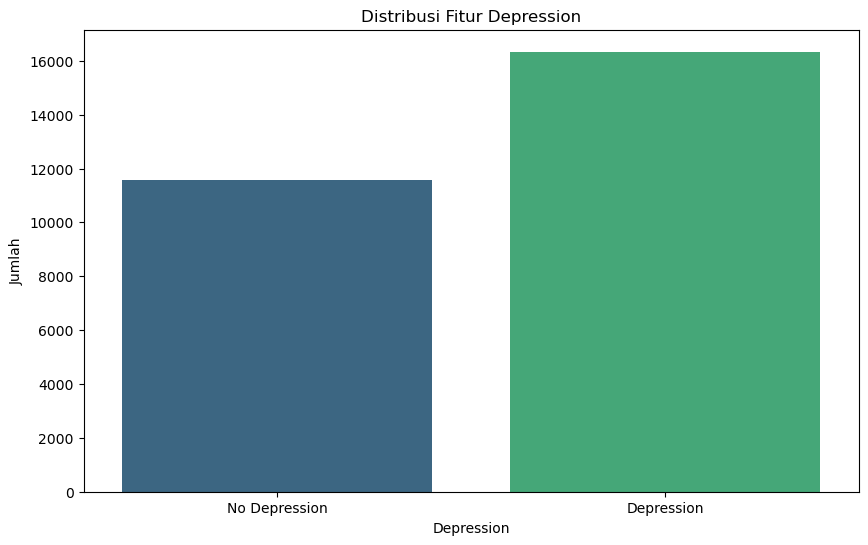

In [11]:
# Menghitung jumlah dari setiap kelas pada fitur Depression
depression_counts = data['Depression'].value_counts()

# Menampilkan hasil
print("Jumlah dari setiap kelas pada fitur Depression:")
print(depression_counts)

# Membuat diagram batang untuk distribusi fitur Depression
plt.figure(figsize=(10, 6))
sns.barplot(x=depression_counts.index, y=depression_counts.values, palette='viridis')
plt.title('Distribusi Fitur Depression')
plt.xlabel('Depression')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['No Depression', 'Depression'])
plt.show()

In [12]:
# Mengecek jumlah nilai yang hilang di fitur yang sudah dipilih
missing_values_selected_features = data[selected_features].isnull().sum()
print("Jumlah nilai yang hilang di fitur yang sudah dipilih:")
print(missing_values_selected_features)

Jumlah nilai yang hilang di fitur yang sudah dipilih:
Academic Pressure                         9
Study Satisfaction                       10
Sleep Duration                           18
Dietary Habits                           12
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          3
Family History of Mental Illness          0
Depression                                0
dtype: int64


In [13]:
# Mengecek jumlah total data sebelum menghapus missing value
total_data_before_cleaning = len(data)
print(f"Total data sebelum menghapus missing value: {total_data_before_cleaning}")

# Menghapus baris dengan missing value pada fitur yang dipilih
data_cleaned = data.dropna(subset=selected_features)

# Mengecek jumlah total data setelah menghapus missing value
total_data_cleaned = len(data_cleaned)
print(f"Total data setelah menghapus missing value: {total_data_cleaned}")

Total data sebelum menghapus missing value: 27901
Total data setelah menghapus missing value: 27856


In [14]:
# Mengecek jumlah nilai yang hilang di fitur yang sudah dipilih setelah data dibersihkan
missing_values_after_cleaning = data_cleaned[selected_features].isnull().sum()
print("Jumlah nilai yang hilang di fitur yang sudah dipilih setelah data dibersihkan:")
print(missing_values_after_cleaning)

Jumlah nilai yang hilang di fitur yang sudah dipilih setelah data dibersihkan:
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


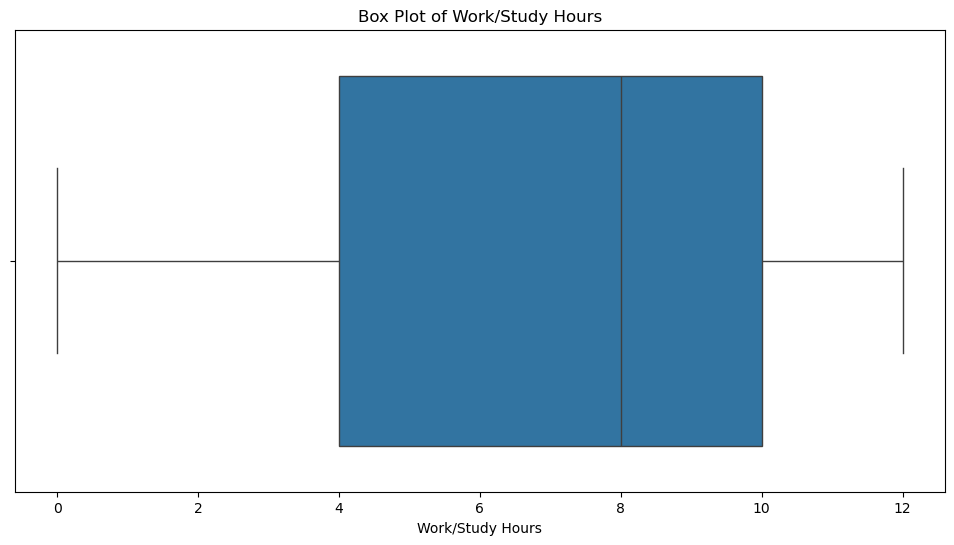

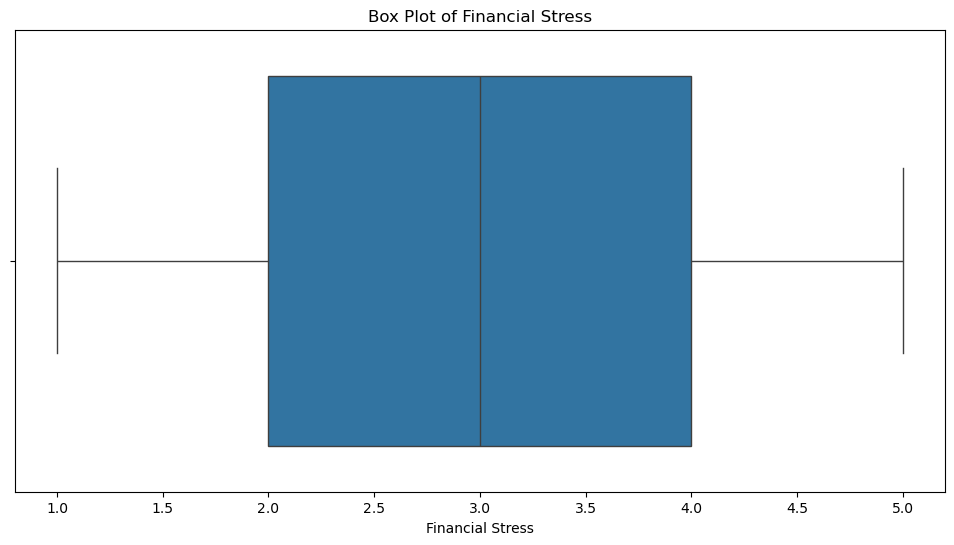

In [15]:
# Membuat box plot untuk fitur Work/Study Hours
plt.figure(figsize=(12, 6))
sns.boxplot(x='Work/Study Hours', data=data_cleaned)
plt.title('Box Plot of Work/Study Hours')
plt.xlabel('Work/Study Hours')
plt.show()

# Membuat box plot untuk fitur Financial Stress
plt.figure(figsize=(12, 6))
sns.boxplot(x='Financial Stress', data=data_cleaned)
plt.title('Box Plot of Financial Stress')
plt.xlabel('Financial Stress')
plt.show()

In [16]:
# Menentukan label dan fitur yang dipilih
label = 'Depression'
features = selected_features[:-1]  # Mengambil semua fitur kecuali label

# Membagi data menjadi fitur (X) dan label (y)
X = data_cleaned[features]
y = data_cleaned[label]

# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data train dan test
print(f"Ukuran data train: {X_train.shape[0]}")
print(f"Ukuran data test: {X_test.shape[0]}")

Ukuran data train: 22284
Ukuran data test: 5572


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2257
           1       0.84      0.85      0.85      3315

    accuracy                           0.82      5572
   macro avg       0.81      0.81      0.81      5572
weighted avg       0.82      0.82      0.82      5572

Accuracy Score (Test Data):
0.8178391959798995
Accuracy Score (Training Data):
0.9699335846347155


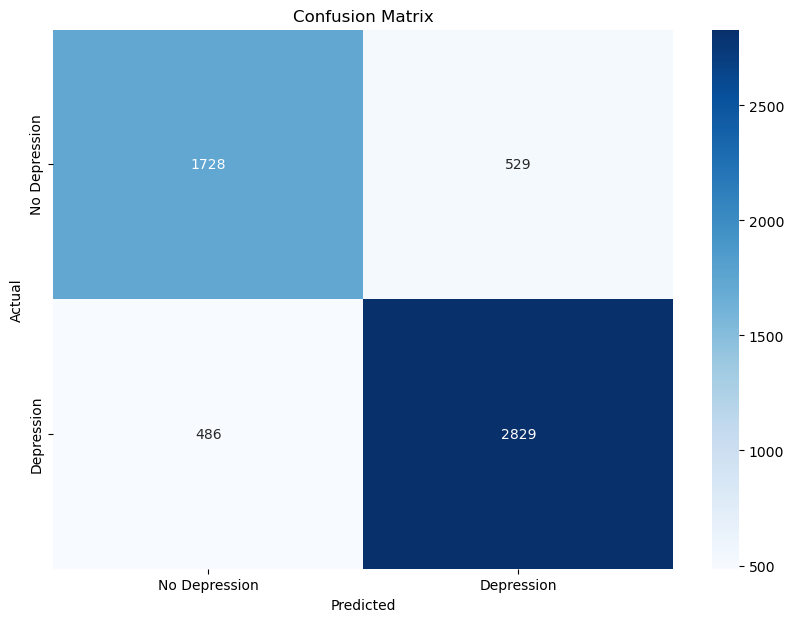

In [17]:
# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data training
model.fit(X_train, y_train)

# Memprediksi label untuk data test
y_pred = model.predict(X_test)

# Menampilkan laporan klasifikasi dan akurasi
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred))

print("Accuracy Score (Test Data):")
print(accuracy_score(y_test, y_pred))

# Memprediksi label untuk data training
y_train_pred = model.predict(X_train)

# Menampilkan akurasi untuk data training
print("Accuracy Score (Training Data):")
print(accuracy_score(y_train, y_train_pred))

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()